In [1]:
ls /media/andre

11D9-5C57/  5161-4A93/  9B57-8640/  maternal/


In [2]:
from pathlib import Path 

# On my system, this is where the storage devices are mounted
MOUNT_POINT = Path("/media/andre")

# The names of drives the data exists
DRIVES = [
    '11D9-5C57',
    '5161-4A93',
    '9B57-8640'
]

# Where we want to store the videos
OUTPUT_DRIVE = MOUNT_POINT / 'maternal'

In [3]:
%%time

total_size = 0
for drive in DRIVES:
    # glob is a useful tool for searching folders, here we tell it to find every file
    files = (MOUNT_POINT / drive).glob('**/*')
    
    # Only keep the files (discard directories)
    files = list(filter(lambda x: x.is_file(), files)) 
    
    # Get the size of each file
    sizes = list(map(lambda x: x.stat().st_size, files)) 
    size = sum(sizes)
    total_size += size
    
    # print the size in gigabytes
    print(f"Drive {drive} is {size / 1e9:.2f}GB")
    
# print the total size
print(f"Total: {total_size / 1e9:.2f}GB")

Drive 11D9-5C57 is 997.12GB
Drive 5161-4A93 is 491.29GB
Drive 9B57-8640 is 705.03GB
Total: 2193.44GB
CPU times: user 60.7 ms, sys: 23.9 ms, total: 84.6 ms
Wall time: 84.5 ms


In [4]:
total_size = 0

# Use a set instead of a list to ignore duplicates
extensions = set()
for drive in DRIVES:
    files = (MOUNT_POINT / drive).glob('**/*')
    files = list(filter(lambda x: x.is_file(), files))
    
    # Get the extensions
    for filepath in files:
        fileparts = filepath.parts[-1].split('.')
        
        # Some files don't have extensions, ignore those
        if len(fileparts) > 1:
            extensions.add(fileparts[-1])

print("Extensions: ", list(extensions))

Extensions:  ['MPG', 'indexPositions', 'indexDirectory', 'indexGroups', '_KO15 Day 20', 'zip', 'updates', '_KO16 day 15', 'shadowIndexGroups', 'shadowIndexTermIds', 'wbverify', 'indexPostings', 'directoryStoreFile', 'Cab', 'state', 'indexHead', 'indexIds', '_WT3 day 15', 'shadowIndexDirectory', '10', 'wbcat', '9', '_KO112 D15', 'shadowIndexCompactDirectory', 'indexTermIds', '_KO15 day 15', '_KO16 day 20', 'indexUpdates', 'shadowIndexPositionTable', 'indexCompactDirectory', 'txt', 'db', 'shadowIndexArrays', 'plist', '_ko9 day 20', 'indexBigDates', 'ini', 'indexPositionTable', '_KO152 DAY 15', '_KO10 DAY 20', 'loc', 'created', '159', 'shadowIndexHead', 'mp4', 'SnowLeopard', '2', '_KO12 day 15', 'donotpresent', 'Trashes', '_KO10 DAY 15', 'indexArrays', 'bin', 'shadow', '1', '_KO14 day 20', 'dat', '_KO152 Day20', 'modified']


In [5]:
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    
    print(f"Number of videos in {drive}: {len(videos)}")

Number of videos in 11D9-5C57: 1102
Number of videos in 5161-4A93: 528


Number of videos in 9B57-8640: 673


In [6]:
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    videos = list(map(str, videos)) # makes things a bit prettier
    print(videos)

['/media/andre/11D9-5C57/ch04_20141026223910.mp4', '/media/andre/11D9-5C57/ch04_20141027002615.mp4', '/media/andre/11D9-5C57/._ch02_20141004031546.mp4', '/media/andre/11D9-5C57/ch04_20141027021320.mp4', '/media/andre/11D9-5C57/ch04_20141027040025.mp4', '/media/andre/11D9-5C57/ch04_20141027054731.mp4', '/media/andre/11D9-5C57/ch04_20141027073438.mp4', '/media/andre/11D9-5C57/ch07_20141029182333.mp4', '/media/andre/11D9-5C57/ch07_20141029185404.mp4', '/media/andre/11D9-5C57/ch07_20141029204109.mp4', '/media/andre/11D9-5C57/ch07_20141029222816.mp4', '/media/andre/11D9-5C57/ch07_20141030001521.mp4', '/media/andre/11D9-5C57/ch07_20141030020226.mp4', '/media/andre/11D9-5C57/ch07_20141030034933.mp4', '/media/andre/11D9-5C57/ch07_20141030053638.mp4', '/media/andre/11D9-5C57/ch07_20141030072343.mp4', '/media/andre/11D9-5C57/ch07_20141030091049.mp4', '/media/andre/11D9-5C57/ch07_20141030105756.mp4', '/media/andre/11D9-5C57/ch07_20141030124501.mp4', '/media/andre/11D9-5C57/ch07_20141030143208.mp4

In [7]:
def is_visible(filepath):
    for part in filepath.parts:
        if part.startswith('.'):
            return False
        
    return True

def is_not_recycled(filepath):
    for part in filepath.parts:
        if part.startswith('$RECYCLE'):
            return False
        
    return True
    
all_videos = []
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    
    all_videos_len = len(videos)
    videos = list(filter(is_visible, videos))
    videos = list(filter(is_not_recycled, videos))
    after_filtering_len = len(videos)
    all_videos += videos
    
    print(f"Length of videos before filtering: {all_videos_len:4}, after: {after_filtering_len}")

Length of videos before filtering: 1102, after: 924
Length of videos before filtering:  528, after: 439


Length of videos before filtering:  673, after: 553


In [8]:
pip install -q treelib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import treelib
from tqdm import tqdm

tree = treelib.Tree()
tree.create_node('/', '/')
for video in tqdm(all_videos):
    video = video.relative_to(MOUNT_POINT)
    parts = video.parts[:-1] # don't include filename
    for i in range(1,len(parts)+1):
        uid = '/'.join(parts[:i])
        name = parts[i-1]
        
        if tree.contains(uid):
            continue 
        
        # include parent
        if i > 1:
            parent_uid = '/'.join(parts[:i-1])
            tree.create_node(name, uid, parent=parent_uid)
        else:
            tree.create_node(name, uid, parent='/')
            
tree.show()

  0%|          | 0/1916 [00:00<?, ?it/s]

100%|██████████| 1916/1916 [00:00<00:00, 213827.70it/s]

/
├── 11D9-5C57
│   ├── Day10s
│   │   └── ko10 day 10
│   ├── KO10 DAY 15
│   ├── KO10 DAY 20
│   ├── KO112 D15
│   ├── KO12 day 10
│   ├── KO12 day 15
│   ├── KO14 day 20
│   ├── KO15 Day 20
│   ├── KO15 day 15
│   ├── KO152 DAY 10
│   ├── KO152 DAY 15
│   ├── KO152 Day20
│   ├── KO16 day 15
│   ├── KO16 day 20
│   ├── WT3 DAY 20
│   ├── WT3 day 10
│   ├── WT3 day 15
│   ├── WT6 DAY 20
│   ├── WT72 D15
│   ├── WT72 DAY 10
│   ├── WT72 DAY 15
│   ├── WT72 DAY 20
│   │   └── WT12 D15
│   │       └── WT12 day 15
│   ├── WT8 DAY 15
│   ├── WT8 day 20
│   ├── WT82 D10
│   ├── WT82 D20
│   ├── WT82 DAY 15
│   ├── WT82 DAY 20
│   ├── ko9 day 20
│   └── wt6 day 15
├── 5161-4A93
│   ├── Day10s
│   ├── KO112 D15
│   ├── KO15 Day 20
│   ├── KO15 day 15
│   ├── KO9 Day 20
│   ├── WT72 D15
│   ├── WT72 Day 20
│   │   └── WT12 D15
│   │       └── WT12 day 15
│   ├── WT8 Day 15
│   └── WT82 D20
└── 9B57-8640
    ├── AVIDEOS
    │   └── stef videos
    ├── KO10 day 10
    ├── KO11 day 20
    ├── KO1

In [10]:
import pandas as pd
import cv2
from tqdm import tqdm

metadata = []
for video in tqdm(all_videos):
    cap = cv2.VideoCapture(str(video))
    _metadata = {
        'file': video,
        'filetype': video.parts[-1].split('.')[-1],
        'frames': int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'fps': float(cap.get(cv2.CAP_PROP_FPS)),
        'width': int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        'height': int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    }
    metadata.append(_metadata)
    
metadata_df = pd.DataFrame(metadata)
metadata_df

  0%|          | 0/1916 [00:00<?, ?it/s]

  0%|          | 8/1916 [00:00<00:25, 73.72it/s]

  1%|          | 17/1916 [00:00<00:23, 80.32it/s]

  1%|▏         | 26/1916 [00:00<00:23, 80.56it/s]

  2%|▏         | 35/1916 [00:00<00:24, 77.60it/s]

  2%|▏         | 43/1916 [00:00<00:24, 76.61it/s]

  3%|▎         | 52/1916 [00:00<00:23, 80.10it/s]

  3%|▎         | 61/1916 [00:00<00:22, 81.69it/s]

  4%|▎         | 70/1916 [00:00<00:22, 82.36it/s]

  4%|▍         | 80/1916 [00:00<00:21, 86.67it/s]

  5%|▍         | 89/1916 [00:01<00:22, 82.89it/s]

  5%|▌         | 98/1916 [00:01<00:23, 78.29it/s]

  6%|▌         | 106/1916 [00:01<00:23, 76.38it/s]

  6%|▌         | 115/1916 [00:01<00:22, 78.93it/s]

  6%|▋         | 123/1916 [00:01<00:30, 59.67it/s]

  7%|▋         | 130/1916 [00:01<00:30, 59.18it/s]

  7%|▋         | 137/1916 [00:01<00:30, 58.28it/s]

  8%|▊         | 146/1916 [00:02<00:27, 64.52it/s]

  8%|▊         | 154/1916 [00:02<00:26, 66.24it/s]

  8%|▊         | 161/1916 [00:02<00:26, 66.52it/s]

  9%|▉         | 169/1916 [00:02<00:25, 68.94it/s]

  9%|▉         | 177/1916 [00:02<00:25, 68.33it/s]

 10%|▉         | 185/1916 [00:02<00:25, 68.65it/s]

 10%|█         | 193/1916 [00:02<00:24, 69.72it/s]

 10%|█         | 201/1916 [00:02<00:24, 70.53it/s]

 11%|█         | 209/1916 [00:02<00:24, 69.08it/s]

 11%|█▏        | 217/1916 [00:03<00:23, 71.94it/s]

 12%|█▏        | 227/1916 [00:03<00:21, 77.62it/s]

 12%|█▏        | 237/1916 [00:03<00:20, 83.69it/s]

 13%|█▎        | 248/1916 [00:03<00:18, 89.01it/s]

 13%|█▎        | 258/1916 [00:03<00:18, 90.33it/s]

 14%|█▍        | 269/1916 [00:03<00:17, 94.14it/s]

 15%|█▍        | 280/1916 [00:03<00:17, 95.05it/s]

 15%|█▌        | 290/1916 [00:03<00:17, 92.56it/s]

 16%|█▌        | 300/1916 [00:03<00:18, 89.06it/s]

 16%|█▌        | 309/1916 [00:04<00:19, 84.34it/s]

 17%|█▋        | 318/1916 [00:04<00:19, 81.22it/s]

 17%|█▋        | 328/1916 [00:04<00:18, 85.68it/s]

 18%|█▊        | 337/1916 [00:04<00:18, 83.92it/s]

 18%|█▊        | 346/1916 [00:04<00:18, 83.53it/s]

 19%|█▊        | 355/1916 [00:04<00:18, 83.11it/s]

 19%|█▉        | 364/1916 [00:04<00:18, 83.56it/s]

 19%|█▉        | 373/1916 [00:04<00:18, 83.71it/s]

 20%|█▉        | 382/1916 [00:04<00:18, 84.28it/s]

 20%|██        | 391/1916 [00:05<00:18, 81.89it/s]

 21%|██        | 400/1916 [00:05<00:18, 80.99it/s]

 21%|██▏       | 409/1916 [00:05<00:19, 78.03it/s]

 22%|██▏       | 418/1916 [00:05<00:18, 80.48it/s]

 22%|██▏       | 427/1916 [00:05<00:18, 80.20it/s]

 23%|██▎       | 436/1916 [00:05<00:18, 80.83it/s]

 23%|██▎       | 445/1916 [00:05<00:18, 78.05it/s]

 24%|██▎       | 455/1916 [00:05<00:17, 82.55it/s]

 24%|██▍       | 464/1916 [00:05<00:18, 79.26it/s]

 25%|██▍       | 472/1916 [00:06<00:18, 77.34it/s]

 25%|██▌       | 481/1916 [00:06<00:18, 77.83it/s]

 26%|██▌       | 489/1916 [00:06<00:18, 76.06it/s]

 26%|██▌       | 498/1916 [00:06<00:17, 79.03it/s]

 26%|██▋       | 507/1916 [00:06<00:17, 81.32it/s]

 27%|██▋       | 516/1916 [00:06<00:17, 78.03it/s]

 27%|██▋       | 525/1916 [00:06<00:17, 80.17it/s]

 28%|██▊       | 534/1916 [00:06<00:17, 79.55it/s]

 28%|██▊       | 544/1916 [00:06<00:16, 83.30it/s]

 29%|██▉       | 553/1916 [00:07<00:16, 83.56it/s]

 29%|██▉       | 562/1916 [00:07<00:16, 83.14it/s]

 30%|██▉       | 571/1916 [00:07<00:15, 84.93it/s]

 30%|███       | 580/1916 [00:07<00:16, 81.01it/s]

 31%|███       | 589/1916 [00:07<00:16, 81.54it/s]

 31%|███       | 598/1916 [00:07<00:16, 78.28it/s]

 32%|███▏      | 607/1916 [00:07<00:16, 80.77it/s]

 32%|███▏      | 616/1916 [00:07<00:16, 80.80it/s]

 33%|███▎      | 625/1916 [00:07<00:16, 78.18it/s]

 33%|███▎      | 633/1916 [00:08<00:18, 69.78it/s]

 33%|███▎      | 641/1916 [00:08<00:20, 62.96it/s]

 34%|███▍      | 648/1916 [00:08<00:21, 57.91it/s]

 34%|███▍      | 655/1916 [00:08<00:21, 60.00it/s]

 35%|███▍      | 662/1916 [00:08<00:21, 59.65it/s]

 35%|███▍      | 669/1916 [00:08<00:20, 62.00it/s]

 35%|███▌      | 679/1916 [00:08<00:17, 71.47it/s]

 36%|███▌      | 688/1916 [00:08<00:16, 75.58it/s]

 36%|███▋      | 696/1916 [00:09<00:17, 69.62it/s]

 37%|███▋      | 704/1916 [00:09<00:17, 70.21it/s]

 37%|███▋      | 712/1916 [00:09<00:16, 71.41it/s]

 38%|███▊      | 720/1916 [00:09<00:16, 72.10it/s]

 38%|███▊      | 729/1916 [00:09<00:15, 74.92it/s]

 38%|███▊      | 737/1916 [00:09<00:15, 76.21it/s]

 39%|███▉      | 746/1916 [00:09<00:15, 76.82it/s]

 39%|███▉      | 754/1916 [00:09<00:15, 74.99it/s]

 40%|███▉      | 763/1916 [00:09<00:14, 79.10it/s]

 40%|████      | 771/1916 [00:10<00:14, 78.47it/s]

 41%|████      | 780/1916 [00:10<00:14, 80.21it/s]

 41%|████      | 789/1916 [00:10<00:14, 78.50it/s]

 42%|████▏     | 797/1916 [00:10<00:14, 78.60it/s]

 42%|████▏     | 806/1916 [00:10<00:14, 79.25it/s]

 43%|████▎     | 816/1916 [00:10<00:13, 83.30it/s]

 43%|████▎     | 825/1916 [00:10<00:13, 81.40it/s]

 44%|████▎     | 834/1916 [00:10<00:13, 82.49it/s]

 44%|████▍     | 843/1916 [00:10<00:13, 80.11it/s]

 44%|████▍     | 852/1916 [00:11<00:13, 78.36it/s]

 45%|████▍     | 861/1916 [00:11<00:13, 80.14it/s]

 45%|████▌     | 870/1916 [00:11<00:13, 79.62it/s]

 46%|████▌     | 878/1916 [00:11<00:13, 78.35it/s]

 46%|████▌     | 886/1916 [00:11<00:13, 75.55it/s]

 47%|████▋     | 894/1916 [00:11<00:13, 75.73it/s]

 47%|████▋     | 904/1916 [00:11<00:12, 79.78it/s]

 48%|████▊     | 912/1916 [00:11<00:12, 78.43it/s]

 48%|████▊     | 920/1916 [00:11<00:13, 75.94it/s]

 49%|████▊     | 932/1916 [00:12<00:11, 85.18it/s]

 49%|████▉     | 941/1916 [00:12<00:11, 82.81it/s]

 50%|████▉     | 950/1916 [00:12<00:12, 76.96it/s]

 50%|█████     | 958/1916 [00:12<00:12, 76.76it/s]

 50%|█████     | 966/1916 [00:12<00:12, 77.20it/s]

 51%|█████     | 974/1916 [00:12<00:12, 74.20it/s]

 51%|█████▏    | 982/1916 [00:12<00:12, 72.30it/s]

 52%|█████▏    | 991/1916 [00:12<00:12, 76.78it/s]

 52%|█████▏    | 999/1916 [00:12<00:12, 76.40it/s]

 53%|█████▎    | 1008/1916 [00:13<00:11, 78.49it/s]

 53%|█████▎    | 1017/1916 [00:13<00:11, 80.63it/s]

 54%|█████▎    | 1027/1916 [00:13<00:10, 83.67it/s]

 54%|█████▍    | 1036/1916 [00:13<00:10, 83.03it/s]

 55%|█████▍    | 1045/1916 [00:13<00:10, 83.91it/s]

 55%|█████▌    | 1054/1916 [00:13<00:10, 80.83it/s]

 55%|█████▌    | 1063/1916 [00:13<00:10, 80.88it/s]

 56%|█████▌    | 1072/1916 [00:13<00:10, 78.67it/s]

 56%|█████▋    | 1080/1916 [00:13<00:10, 76.50it/s]

 57%|█████▋    | 1088/1916 [00:14<00:11, 75.16it/s]

 57%|█████▋    | 1097/1916 [00:14<00:10, 76.69it/s]

 58%|█████▊    | 1105/1916 [00:14<00:10, 75.29it/s]

 58%|█████▊    | 1113/1916 [00:14<00:10, 73.38it/s]

 59%|█████▊    | 1121/1916 [00:14<00:10, 73.39it/s]

 59%|█████▉    | 1129/1916 [00:14<00:10, 74.39it/s]

 59%|█████▉    | 1139/1916 [00:14<00:09, 78.62it/s]

 60%|█████▉    | 1147/1916 [00:14<00:13, 59.02it/s]

 60%|██████    | 1154/1916 [00:15<00:12, 60.83it/s]

 61%|██████    | 1161/1916 [00:15<00:11, 62.99it/s]

 61%|██████    | 1169/1916 [00:15<00:11, 65.92it/s]

 61%|██████▏   | 1176/1916 [00:15<00:11, 65.00it/s]

 62%|██████▏   | 1186/1916 [00:15<00:09, 73.46it/s]

 62%|██████▏   | 1194/1916 [00:15<00:10, 67.61it/s]

 63%|██████▎   | 1201/1916 [00:15<00:10, 66.69it/s]

 63%|██████▎   | 1209/1916 [00:15<00:10, 68.81it/s]

 64%|██████▎   | 1217/1916 [00:15<00:10, 69.25it/s]

 64%|██████▍   | 1227/1916 [00:16<00:09, 76.13it/s]

 65%|██████▍   | 1236/1916 [00:16<00:08, 78.34it/s]

 65%|██████▍   | 1244/1916 [00:16<00:08, 77.20it/s]

 65%|██████▌   | 1252/1916 [00:16<00:08, 75.48it/s]

 66%|██████▌   | 1261/1916 [00:16<00:08, 76.37it/s]

 66%|██████▌   | 1269/1916 [00:16<00:08, 76.52it/s]

 67%|██████▋   | 1278/1916 [00:16<00:07, 80.21it/s]

 67%|██████▋   | 1288/1916 [00:16<00:07, 84.48it/s]

 68%|██████▊   | 1297/1916 [00:16<00:07, 81.63it/s]

 68%|██████▊   | 1306/1916 [00:17<00:07, 80.24it/s]

 69%|██████▊   | 1315/1916 [00:17<00:07, 78.28it/s]

 69%|██████▉   | 1324/1916 [00:17<00:07, 79.43it/s]

 70%|██████▉   | 1333/1916 [00:17<00:07, 80.50it/s]

 70%|███████   | 1342/1916 [00:17<00:07, 80.80it/s]

 71%|███████   | 1351/1916 [00:17<00:07, 79.86it/s]

 71%|███████   | 1359/1916 [00:17<00:07, 75.84it/s]

 71%|███████▏  | 1368/1916 [00:17<00:06, 79.51it/s]

 72%|███████▏  | 1378/1916 [00:17<00:06, 83.80it/s]

 72%|███████▏  | 1387/1916 [00:18<00:06, 84.81it/s]

 73%|███████▎  | 1396/1916 [00:18<00:06, 85.44it/s]

 73%|███████▎  | 1406/1916 [00:18<00:05, 89.23it/s]

 74%|███████▍  | 1415/1916 [00:18<00:05, 89.34it/s]

 74%|███████▍  | 1425/1916 [00:18<00:05, 91.32it/s]

 75%|███████▍  | 1435/1916 [00:18<00:05, 88.55it/s]

 75%|███████▌  | 1444/1916 [00:18<00:05, 82.91it/s]

 76%|███████▌  | 1453/1916 [00:18<00:05, 81.01it/s]

 76%|███████▋  | 1462/1916 [00:18<00:05, 77.39it/s]

 77%|███████▋  | 1470/1916 [00:19<00:05, 77.10it/s]

 77%|███████▋  | 1478/1916 [00:19<00:05, 77.48it/s]

 78%|███████▊  | 1486/1916 [00:19<00:05, 78.04it/s]

 78%|███████▊  | 1494/1916 [00:19<00:05, 77.44it/s]

 78%|███████▊  | 1502/1916 [00:19<00:05, 77.53it/s]

 79%|███████▉  | 1510/1916 [00:19<00:05, 74.95it/s]

 79%|███████▉  | 1520/1916 [00:19<00:06, 60.23it/s]

 80%|███████▉  | 1530/1916 [00:19<00:05, 68.70it/s]

 80%|████████  | 1540/1916 [00:20<00:04, 76.11it/s]

 81%|████████  | 1550/1916 [00:20<00:04, 80.34it/s]

 81%|████████▏ | 1559/1916 [00:20<00:04, 80.93it/s]

 82%|████████▏ | 1568/1916 [00:20<00:04, 76.74it/s]

 82%|████████▏ | 1577/1916 [00:20<00:04, 78.03it/s]

 83%|████████▎ | 1585/1916 [00:20<00:04, 77.03it/s]

 83%|████████▎ | 1593/1916 [00:20<00:04, 76.81it/s]

 84%|████████▎ | 1601/1916 [00:20<00:04, 75.57it/s]

 84%|████████▍ | 1609/1916 [00:20<00:04, 75.98it/s]

 84%|████████▍ | 1617/1916 [00:21<00:04, 74.17it/s]

 85%|████████▍ | 1626/1916 [00:21<00:03, 77.02it/s]

 85%|████████▌ | 1636/1916 [00:21<00:03, 81.28it/s]

 86%|████████▌ | 1647/1916 [00:21<00:03, 86.97it/s]

 86%|████████▋ | 1657/1916 [00:21<00:02, 89.14it/s]

 87%|████████▋ | 1667/1916 [00:21<00:02, 91.79it/s]

 88%|████████▊ | 1677/1916 [00:21<00:02, 85.82it/s]

 88%|████████▊ | 1686/1916 [00:21<00:02, 82.44it/s]

 88%|████████▊ | 1695/1916 [00:21<00:02, 77.70it/s]

 89%|████████▉ | 1704/1916 [00:22<00:02, 80.73it/s]

 90%|████████▉ | 1715/1916 [00:22<00:02, 86.57it/s]

 90%|█████████ | 1725/1916 [00:22<00:02, 87.62it/s]

 91%|█████████ | 1734/1916 [00:22<00:02, 87.99it/s]

 91%|█████████ | 1743/1916 [00:22<00:02, 81.66it/s]

 91%|█████████▏| 1753/1916 [00:22<00:01, 85.35it/s]

 92%|█████████▏| 1763/1916 [00:22<00:01, 86.21it/s]

 92%|█████████▏| 1772/1916 [00:22<00:01, 81.72it/s]

 93%|█████████▎| 1781/1916 [00:22<00:01, 81.57it/s]

 93%|█████████▎| 1790/1916 [00:23<00:01, 81.95it/s]

 94%|█████████▍| 1800/1916 [00:23<00:01, 86.50it/s]

 94%|█████████▍| 1809/1916 [00:23<00:01, 81.00it/s]

 95%|█████████▍| 1818/1916 [00:23<00:01, 77.22it/s]

 95%|█████████▌| 1826/1916 [00:23<00:01, 77.16it/s]

 96%|█████████▌| 1836/1916 [00:23<00:00, 81.07it/s]

 96%|█████████▋| 1845/1916 [00:23<00:00, 83.11it/s]

 97%|█████████▋| 1854/1916 [00:23<00:00, 84.68it/s]

 97%|█████████▋| 1863/1916 [00:23<00:00, 84.57it/s]

 98%|█████████▊| 1872/1916 [00:24<00:00, 84.29it/s]

 98%|█████████▊| 1881/1916 [00:24<00:00, 82.07it/s]

 99%|█████████▊| 1890/1916 [00:24<00:00, 79.11it/s]

100%|█████████▉| 1907/1916 [00:24<00:00, 102.36it/s]

100%|██████████| 1916/1916 [00:24<00:00, 78.42it/s] 

,file,filetype,frames,fps,width,height
0,/media/andre/11D9-5C57/ch04_20141026223910.mp4,mp4,192676,30.00000,704,480
1,/media/andre/11D9-5C57/ch04_20141027002615.mp4,mp4,192706,30.00000,704,480
2,/media/andre/11D9-5C57/ch04_20141027021320.mp4,mp4,192706,30.00000,704,480
3,/media/andre/11D9-5C57/ch04_20141027040025.mp4,mp4,192708,30.00000,704,480
4,/media/andre/11D9-5C57/ch04_20141027054731.mp4,mp4,192736,30.00000,704,480
...,...,...,...,...,...,...
1911,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94226,29.97003,720,480
1912,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94331,29.97003,720,480
1913,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94437,29.97003,720,480
1914,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94362,29.97003,720,480


In [11]:
(metadata_df.frames / metadata_df.fps).sum()

-307445721479635.5

In [12]:
metadata_df.describe()

,frames,fps,width,height
count,1.916000e+03,1916.000000,1916.000000,1916.0
mean,-4.813868e+12,29.999531,704.250522,480.0
std,1.215918e+14,0.003722,1.986869,0.0
min,-3.074457e+15,29.970030,704.000000,480.0
25%,1.927070e+05,30.000000,704.000000,480.0
50%,1.927090e+05,30.000000,704.000000,480.0
75%,1.927380e+05,30.000000,704.000000,480.0
max,2.101409e+06,30.000000,720.000000,480.0


In [13]:
metadata_df.loc[metadata_df.frames < 0]

,file,filetype,frames,fps,width,height
122,/media/andre/11D9-5C57/KO12 day 15/ch05_201503...,mp4,-3074457345618259,30.0,704,480
1143,/media/andre/5161-4A93/ch05_20150308203728 - C...,mp4,-3074457345618259,30.0,704,480
1519,/media/andre/9B57-8640/WT6/WT6 day 15 (9).mp4,mp4,-3074457345618259,30.0,704,480


In [14]:
outlier_rows = metadata_df.frames < 0
metadata_df.loc[outlier_rows, 'frames'] = None
metadata_df.loc[outlier_rows]

,file,filetype,frames,fps,width,height
122,/media/andre/11D9-5C57/KO12 day 15/ch05_201503...,mp4,NaN,30.0,704,480
1143,/media/andre/5161-4A93/ch05_20150308203728 - C...,mp4,NaN,30.0,704,480
1519,/media/andre/9B57-8640/WT6/WT6 day 15 (9).mp4,mp4,NaN,30.0,704,480


In [15]:
(metadata_df.frames / metadata_df.fps).sum()

13082190.523133334

In [16]:
total_seconds = (metadata_df.frames / metadata_df.fps).sum()
total_days = total_seconds / 60 / 60 / 24 # 60s->1m, 60m->1h, 24h->1d
print(f"Total days of videos: {total_days:.1f}")

Total days of videos: 151.4


In [17]:
metadata_df.describe()

,frames,fps,width,height
count,1.913000e+03,1916.000000,1916.000000,1916.0
mean,2.051559e+05,29.999531,704.250522,480.0
std,1.025081e+05,0.003722,1.986869,0.0
min,1.620000e+02,29.970030,704.000000,480.0
25%,1.927070e+05,30.000000,704.000000,480.0
50%,1.927090e+05,30.000000,704.000000,480.0
75%,1.927380e+05,30.000000,704.000000,480.0
max,2.101409e+06,30.000000,720.000000,480.0


In [18]:
metadata_df.width.unique()

array([704, 720])

In [19]:
metadata_df.loc[metadata_df.width==704].describe()

,frames,fps,width,height
count,1.883000e+03,1886.0,1886.0,1886.0
mean,2.071501e+05,30.0,704.0,480.0
std,1.020346e+05,0.0,0.0,0.0
min,1.620000e+02,30.0,704.0,480.0
25%,1.927070e+05,30.0,704.0,480.0
50%,1.927090e+05,30.0,704.0,480.0
75%,1.927380e+05,30.0,704.0,480.0
max,2.101409e+06,30.0,704.0,480.0


In [20]:
metadata_df.loc[metadata_df.width==704].sample(3)

,file,filetype,frames,fps,width,height
1716,/media/andre/9B57-8640/SACHIN/KO12 Day 15 By T...,mp4,318225.0,30.0,704,480
1207,/media/andre/5161-4A93/WT72 Day 20/WT12 D15/WT...,mp4,192707.0,30.0,704,480
1328,/media/andre/5161-4A93/WT72 D15/WT72 D15(21).mp4,mp4,192709.0,30.0,704,480


In [21]:
metadata_df.loc[metadata_df.width==720].describe()

,frames,fps,width,height
count,30.000000,3.000000e+01,30.0,30.0
mean,79989.800000,2.997003e+01,720.0,480.0
std,26287.615716,7.226896e-15,0.0,0.0
min,3221.000000,2.997003e+01,720.0,480.0
25%,80380.250000,2.997003e+01,720.0,480.0
50%,94297.500000,2.997003e+01,720.0,480.0
75%,94458.000000,2.997003e+01,720.0,480.0
max,94561.000000,2.997003e+01,720.0,480.0


In [22]:
metadata_df.loc[metadata_df.width==720].sample(3)

,file,filetype,frames,fps,width,height
1894,/media/andre/9B57-8640/AVIDEOS/M2U00179.MPG,MPG,94290.0,29.97003,720,480
1891,/media/andre/9B57-8640/AVIDEOS/M2U00176.MPG,MPG,94546.0,29.97003,720,480
1909,/media/andre/9B57-8640/AVIDEOS/M2U00194.MPG,MPG,94465.0,29.97003,720,480


In [23]:
print(f"We're not going to reorganize our {len(all_videos)} videos here.")

We're not going to reorganize our 1916 videos here.


In [24]:
import re

with open('transcode.sh', 'w') as fp:
    lines = []
    for video in all_videos:
        relative_path = video.relative_to(MOUNT_POINT)
        output_filepath = OUTPUT_DRIVE / relative_path
        
        # For now lets skip existing filepaths
        if output_filepath.exists():
            continue
        
        cmd = (
            "mkdir -p {output_dir} && " # make a new directory if necessary
            "ffmpeg -y -i {input_file} " # the input file and flags
            "-crf 18 -r 30 -an {output_file}\n" # the output file and flags
        ).format(
            output_dir=re.escape(str(output_filepath.parent)), 
            input_file=re.escape(str(video)), 
            output_file=re.escape(str(output_filepath))
        ) 
        
        lines.append(cmd)
        
    fp.writelines(lines)

In [25]:
! head -n 3 transcode.sh

mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch04_20141027002615\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch04_20141027002615\.mp4
mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch07_20141030053638\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch07_20141030053638\.mp4
mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch07_20141030072343\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch07_20141030072343\.mp4


In [26]:
transcoded_videos = (
    list(OUTPUT_DRIVE.glob('**/*.mp4')) + 
    list(OUTPUT_DRIVE.glob('**/*.MPG'))
)

metadata = []
for transcoded_video in tqdm(transcoded_videos):
    relative_path = transcoded_video.relative_to(OUTPUT_DRIVE)
    original_video = MOUNT_POINT / relative_path
    
    original_cap = cv2.VideoCapture(str(original_video))
    transcoded_cap = cv2.VideoCapture(str(transcoded_video))
    
    _metadata = {
        'original_file': original_video,
        'transcoded_file': transcoded_video,
        'original_frames': int(original_cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'transcoded_frames': int(transcoded_cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'original_filesize_mb': round(original_video.stat().st_size / 1e6, 1), 
        'transcoded_filesize_mb': round(transcoded_video.stat().st_size / 1e6, 1), 
    }
    metadata.append(_metadata)
    
transcoded_metadata_df = pd.DataFrame(metadata)
transcoded_metadata_df

  0%|          | 0/23 [00:00<?, ?it/s]

  9%|▊         | 2/23 [00:00<00:01, 17.77it/s]

 17%|█▋        | 4/23 [00:00<00:01, 18.19it/s]

 30%|███       | 7/23 [00:00<00:00, 20.72it/s]

 43%|████▎     | 10/23 [00:00<00:00, 22.15it/s]

 57%|█████▋    | 13/23 [00:00<00:00, 24.38it/s]

 70%|██████▉   | 16/23 [00:00<00:00, 25.75it/s]

 87%|████████▋ | 20/23 [00:00<00:00, 29.11it/s]

100%|██████████| 23/23 [00:00<00:00, 22.91it/s]

100%|██████████| 23/23 [00:00<00:00, 23.27it/s]

,original_file,transcoded_file,original_frames,transcoded_frames,original_filesize_mb,transcoded_filesize_mb
0,/media/andre/11D9-5C57/ch04_20141026223910.mp4,/media/andre/maternal/11D9-5C57/ch04_201410262...,192676,192676,1066.0,52.9
1,/media/andre/11D9-5C57/ch04_20141027021320.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,192706,192706,1066.2,110.9
2,/media/andre/11D9-5C57/ch04_20141027040025.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,192708,192708,1066.2,117.0
3,/media/andre/11D9-5C57/ch04_20141027054731.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,192736,192736,1066.3,114.8
4,/media/andre/11D9-5C57/ch04_20141027073438.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,57074,57074,315.8,83.0
5,/media/andre/11D9-5C57/ch07_20141029182333.mp4,/media/andre/maternal/11D9-5C57/ch07_201410291...,55063,55063,304.6,258.0
6,/media/andre/11D9-5C57/ch07_20141029185404.mp4,/media/andre/maternal/11D9-5C57/ch07_201410291...,192710,192710,1066.1,510.0
7,/media/andre/11D9-5C57/ch07_20141029204109.mp4,/media/andre/maternal/11D9-5C57/ch07_201410292...,192738,192738,1066.2,327.9
8,/media/andre/11D9-5C57/ch07_20141029222816.mp4,/media/andre/maternal/11D9-5C57/ch07_201410292...,192708,192708,1066.1,354.9
9,/media/andre/11D9-5C57/ch07_20141030001521.mp4,/media/andre/maternal/11D9-5C57/ch07_201410300...,192707,192707,1066.1,238.5


In [27]:
transcoded_metadata_df.describe()

,original_frames,transcoded_frames,original_filesize_mb,transcoded_filesize_mb
count,23.000000,23.000000,23.000000,23.000000
mean,198045.913043,158858.565217,925.230435,238.634783
std,163801.763922,67286.935757,320.636755,170.750577
min,219.000000,0.000000,1.300000,0.600000
25%,192691.000000,192676.000000,1066.050000,112.850000
50%,192708.000000,192708.000000,1066.100000,206.600000
75%,192709.500000,192709.000000,1066.200000,329.500000
max,901309.000000,192740.000000,1066.300000,631.400000


In [28]:
transcoded_metadata_df.original_frames - transcoded_metadata_df.transcoded_frames

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12    708601
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22    192708
dtype: int64

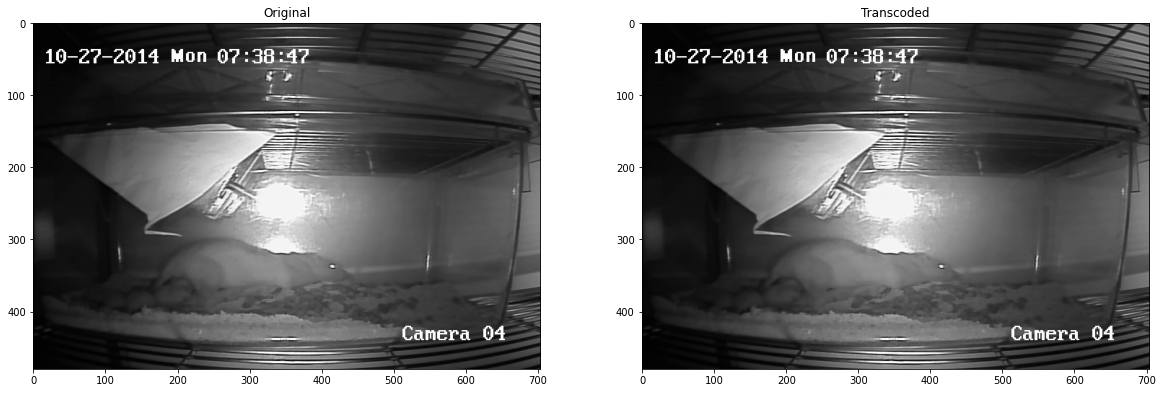

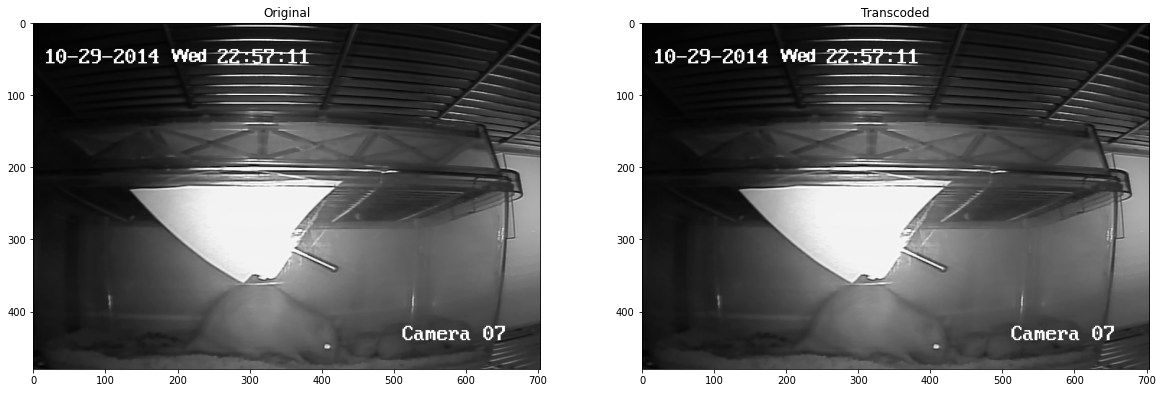

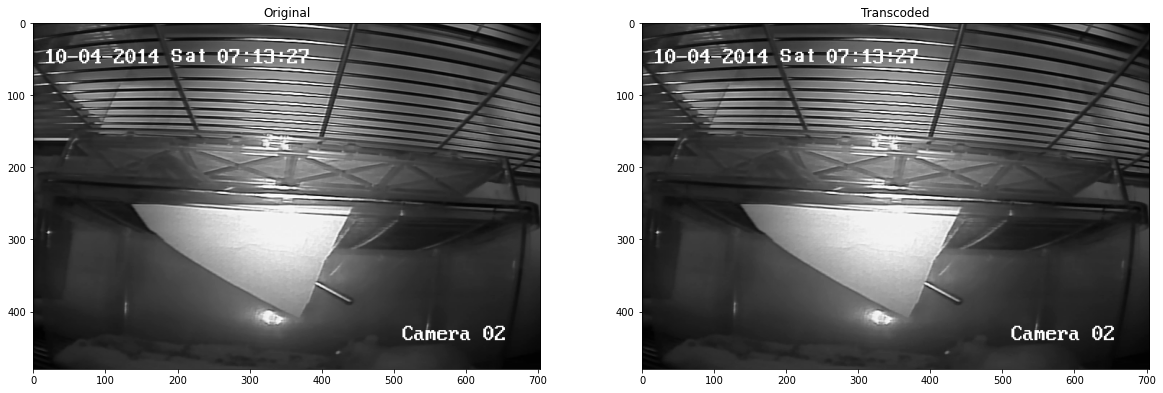

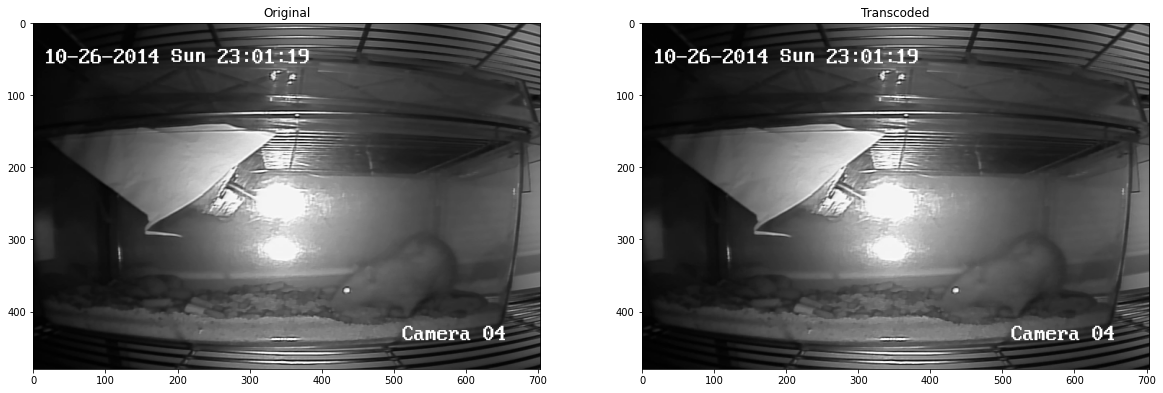

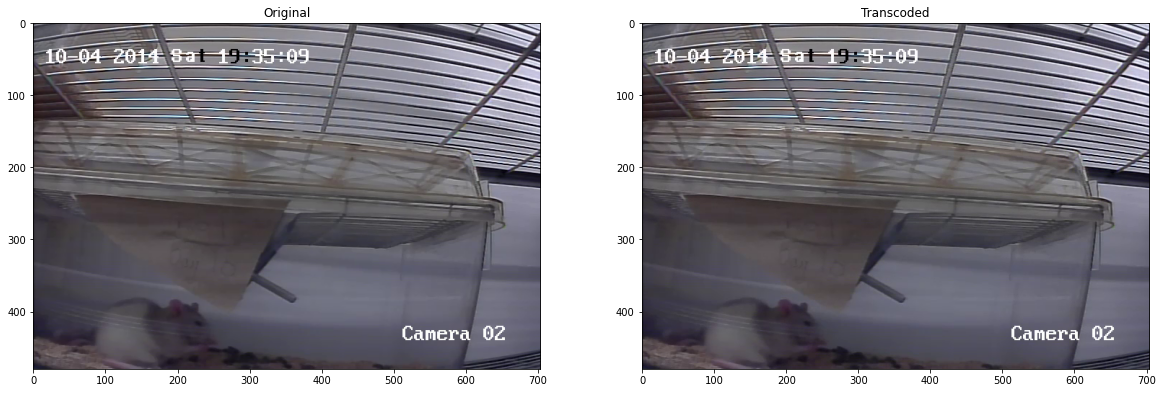

In [29]:
import numpy as np
import matplotlib.pyplot as plt

for idx, row in transcoded_metadata_df.sample(5).iterrows():
    frames = min(row.transcoded_frames, row.original_frames)
    frame_idx = np.random.randint(frames)
    
    original_cap = cv2.VideoCapture(str(row.original_file))
    original_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    transcoded_cap = cv2.VideoCapture(str(row.transcoded_file))
    transcoded_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    plt.figure(figsize=(20, 8))
    gs = plt.GridSpec(1, 2)
    plt.subplot(gs[0])
    plt.title('Original')
    ret, frame = original_cap.read()
    frame = np.flip(frame, axis=2)
    plt.imshow(frame)
    
    plt.subplot(gs[1])
    plt.title('Transcoded')
    ret, frame = transcoded_cap.read()
    frame = np.flip(frame, axis=2)
    plt.imshow(frame)
    
    plt.show()